# Homework Week 4

ChatGPT history logs:

Q1:https://chatgpt.com/share/66f8cc0f-406c-8004-9165-3514474df530

Q2:https://chatgpt.com/share/66f8d08c-bc08-8004-9a9d-6dcb01c8259e

Q3:https://chatgpt.com/share/66f8d307-97b0-8004-93cf-99c11085e8b4

Q4:https://chatgpt.com/share/66f8d30d-6e64-8004-95f7-2e73f03fa3ee

Q5:https://chatgpt.com/share/66f97113-3af0-8004-a57f-e57c1446d9ef

Q8:https://chatgpt.com/share/66f97cad-40e8-8004-a85f-e9f241deb8af


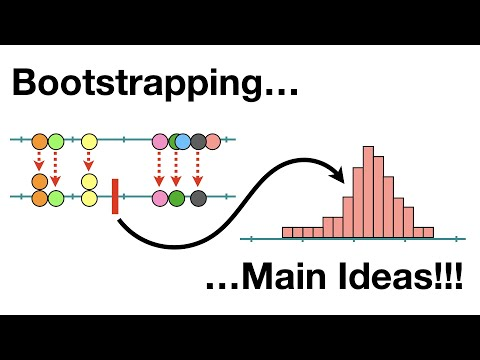

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#### QUESTION 1

Standard deviation measures the spread around the mean of a data set. A high value suggests that the data points are spread out whilst a lower value means that the data points are more closely together. On the other hand, "Standard error of the mean" tells you how much the sample mean of the data set differs from the true population mean. A smaller number generally refers to higher accuracy.

#### QUESTION 2

You can do this by first generating a bootstrap sample from your original data set. Proceed by calculating the mean for each sample. Next, caculate the 2.5th and 97.5th percentile of the bootstrapped means, and this would give you the 95% confidence interval. The following formula can be used:

CI = [Percentile(2.5), Percentile(97.5)]

#### QUESTION 3

First, start off by generating a bootstrap data sample and compute the mean for each sample. Next, you can directly use "np.quantile()" to directly compute the 2.5th and 97.5th percentiles as shown below.

In [3]:
import numpy as np

# Example data array
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace this with your actual data

# Step 1: Generate bootstrapped samples
N = 1000  # Number of bootstraps
bootstrapped_means = []

for _ in range(N):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrapped_means.append(np.mean(sample))

# Convert the list to a NumPy array
bootstrapped_means = np.array(bootstrapped_means)

# Step 3: Use np.quantile to compute the 95% confidence interval
confidence_interval = np.quantile(bootstrapped_means, [0.025, 0.975])

print(f"95% Bootstrapped Confidence Interval: {confidence_interval}")



95% Bootstrapped Confidence Interval: [3.8 7.2]


In [5]:
### QUESTION 4 (code, the understanding part is done in chat)

import numpy as np

# Function to calculate the bootstrap confidence interval for the mean
def bootstrap_ci(data, num_bootstrap_samples=10000, confidence_level=0.95):
    n = len(data)
    
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, n), replace=True)
    
    # Calculate the means for each bootstrap sample
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    
    # Calculate quantiles for the confidence interval
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = (1 + confidence_level) / 2
    ci_lower = np.quantile(bootstrap_means, lower_quantile)
    ci_upper = np.quantile(bootstrap_means, upper_quantile)
    
    return ci_lower, ci_upper

# Sample data
sample_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data)
print(f"95% Bootstrap Confidence Interval for the population mean: {mean_ci}")

# Function to calculate the bootstrap confidence interval for the median
def bootstrap_ci_median(data, num_bootstrap_samples=10000, confidence_level=0.95):
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the medians for each bootstrap sample
    bootstrap_medians = np.median(bootstrap_samples, axis=1)
    
    # Calculate quantiles for the confidence interval
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = (1 + confidence_level) / 2
    ci_lower = np.quantile(bootstrap_medians, lower_quantile)
    ci_upper = np.quantile(bootstrap_medians, upper_quantile)
    
    return ci_lower, ci_upper

# Calculate 95% bootstrap confidence interval for the population median
median_ci = bootstrap_ci_median(sample_data)
print(f"95% Bootstrap Confidence Interval for the population median: {median_ci}")


95% Bootstrap Confidence Interval for the population mean: (3.7, 7.3)
95% Bootstrap Confidence Interval for the population median: (3.0, 8.0)


#### QUESTION 5

A population parameter is a fixed value and it determines a characterstic of the population sample, such as the true mean. A sample statistic is a calculated value from a sample, such as the sample mean. It is important to distguish them when dealing with confidence intervals because you have to use sample satistics to calculate the population parameter - which is a range that the poupulation parameter can fall under.

#### QUESTION 6

1. Boostrapping is when you take the original data and create a new sample of the same size. You then take the desired statistics (such as mean, median, etc) of each sample, which is repeated, to generate a distribution of the statistic. 

2. This distribution of statistic is used to estimate confidence intervals, standard errors, or test hypotheses about the orginal data.

3. You start of by calcuating the mean of the sample from your data set. Bootstrapping will generate many new resampled data, which is created by drawing out "n" values from your sample with replacement. Once you calculate the confidence interval, if your hypothesis guess is outside of the confidence interval range, your hypothesis is likely off.


#### QUESTION 7

Usually, a null hypothesis means that the population mean is zero, which tells you that there is no difference in the population. When a confidence interval includes the value zero, you cannont rule out zero as a possibility of the true mean. This results in failing to reject the null hypothesis since the evidence is insufficient to conclude that the true mean is different from zero. On the other hand, if the code rejects the null hypothesis, this means that the confidence interval does not include a zero and that the population mean is very different from zero.

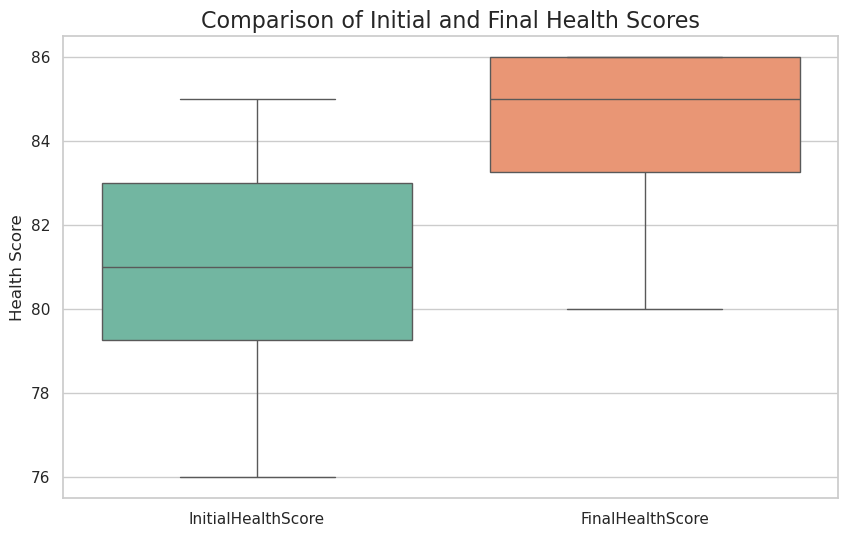

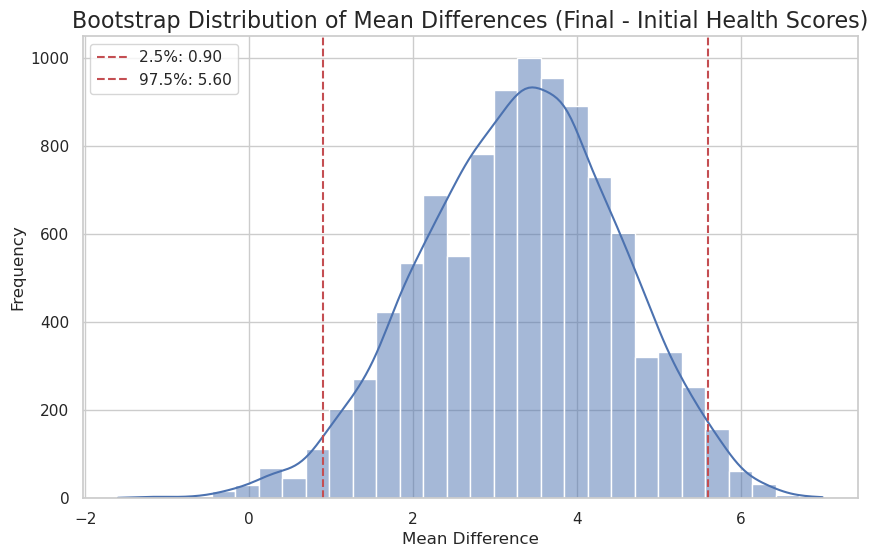

95% Confidence Interval for the Mean Difference: [0.9 5.6]


In [10]:
# QUESTION 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the DataFrame with the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Step 3: Visual Presentation (Boxplot)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']], palette="Set2")
plt.title("Comparison of Initial and Final Health Scores", fontsize=16)
plt.ylabel("Health Score", fontsize=12)
plt.show()

# Step 4: Bootstrapping for Quantitative Analysis

# Define a function to perform bootstrap resampling and calculate mean differences
def bootstrap_mean_diff(data, n_resamples=10000):
    np.random.seed(42)
    diffs = []
    for _ in range(n_resamples):
        sample = data.sample(frac=1, replace=True)  # Bootstrap resample
        mean_diff = sample['FinalHealthScore'].mean() - sample['InitialHealthScore'].mean()
        diffs.append(mean_diff)
    return np.array(diffs)

# Perform bootstrap on the health scores
bootstrap_diffs = bootstrap_mean_diff(df)

# Calculate 95% confidence intervals
conf_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

# Step 5: Visualizing the Bootstrap Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, kde=True, color="b", bins=30)
plt.axvline(conf_interval[0], color='r', linestyle='--', label=f'2.5%: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='r', linestyle='--', label=f'97.5%: {conf_interval[1]:.2f}')
plt.title("Bootstrap Distribution of Mean Differences (Final - Initial Health Scores)", fontsize=16)
plt.xlabel("Mean Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

# Display the confidence interval
print("95% Confidence Interval for the Mean Difference:", conf_interval)


#### QUESTION 9

MOSTLY, still need to do some reviewing and practicing.